# Figure 3 plots

In [1]:
import os
from pathlib import Path
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cwd = os.getcwd()
if cwd.endswith('notebook'):
    os.chdir('..')
    cwd = os.getcwd()

In [2]:
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

data_folder = Path('./data')
assert data_folder.is_dir()

figures_folder = Path('./figures')
assert figures_folder.is_dir()

In [3]:
a_halodurans_accession = 'GCF_004376175.1'
p_endophyticus_accession = 'GCF_011326735.1'
v_salexigens_accession = 'GCF_014905415.1'

## Phage endolysins

In [4]:
p_endo = pd.read_csv(data_folder / 'virushostdb_phages_pgh_hits_hosts.csv', index_col='query')
p_endo['query_protein_id'] = [v.split('@')[0] for v in p_endo.index]
p_endo['query_accession'] = [v.split('@')[1].split('$')[0] for v in p_endo.index]
p_endo.head()

,target,pfam_domain,domain_type,normalized_score,rank,query_protein_id,query_accession
query,,,,,,,
AAZ82464.1@DQ113772$Amidase_2:16-152,WP_000350458.1@GCF_001457635.1,Amidase_2,catalytic,95.81,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:196-215,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,82.34,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:217-237,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,74.79,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:238-257,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,82.05,1,AAZ82464.1,DQ113772
AAZ82464.1@DQ113772$Choline_bind_1:258-278,WP_000350458.1@GCF_001457635.1,Choline_bind_1,cell wall binding,83.15,1,AAZ82464.1,DQ113772


### Keep best ranking domain per protein

Split by CWB vs catalytic domains.

In [5]:
pgh_domains = pd.read_csv(data_folder / 'pgh_domains.csv')
cw_binding_domains = sorted(pgh_domains[pgh_domains['kind'] == 'Cell wall binding']['short_name'].values)
catalytic_domains = sorted(pgh_domains[pgh_domains['kind'] == 'Catalytic']['short_name'].values)

cwb_scores = p_endo[
    p_endo['pfam_domain'].isin(cw_binding_domains)
].sort_values(['query_protein_id', 'rank']).drop_duplicates('query_protein_id')

cat_scores = p_endo[
    p_endo['pfam_domain'].isin(catalytic_domains)
].sort_values(['query_protein_id', 'rank']).drop_duplicates('query_protein_id')

### Plot rank

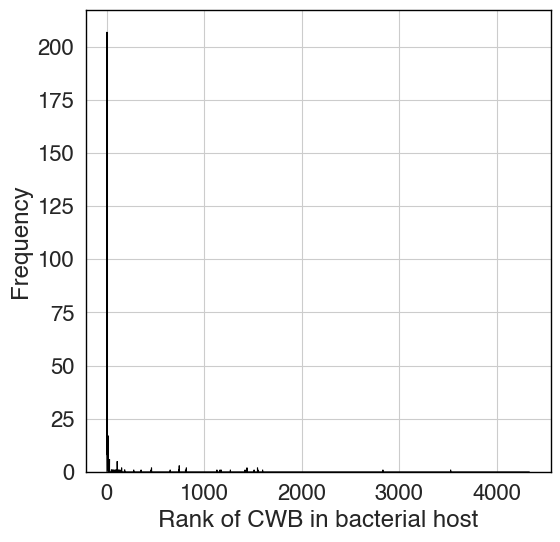

In [6]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

max_rank = cwb_scores['rank'].max()
bins = np.arange(0.5, max_rank, 1)
cwb_scores['rank'].hist(bins=bins, ax=ax, color='black', histtype='step');

ax.set_xlabel('Rank of CWB in bacterial host');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figure3' / 'phage_endolysins_cwb_rank.pdf', dpi=300, bbox_inches='tight', transparent=True);

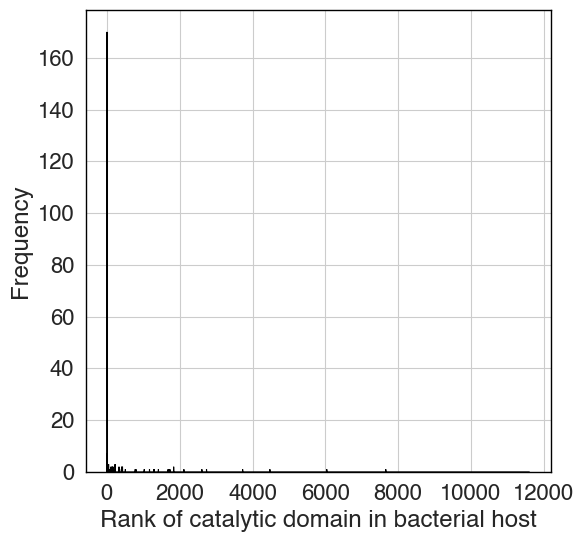

In [7]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

max_rank = cat_scores['rank'].max()
bins = np.arange(0.5, max_rank, 1)
cat_scores['rank'].hist(bins=bins, ax=ax, color='black', histtype='step');

ax.set_xlabel('Rank of catalytic domain in bacterial host');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figure3' / 'phage_endolysins_cat_rank.pdf', dpi=300, bbox_inches='tight', transparent=True);

### Plot normalized bitscore

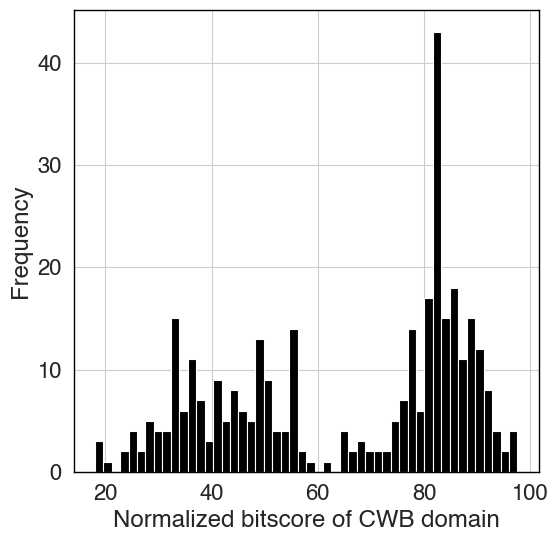

In [8]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
cwb_scores['normalized_score'].hist(bins=50, ax=ax, color='black');
ax.set_xlabel('Normalized bitscore of CWB domain');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    
f.savefig(figures_folder / 'figure3' / 'phage_endolysins_cwb_bitscore.pdf', dpi=300, bbox_inches='tight', transparent=True);

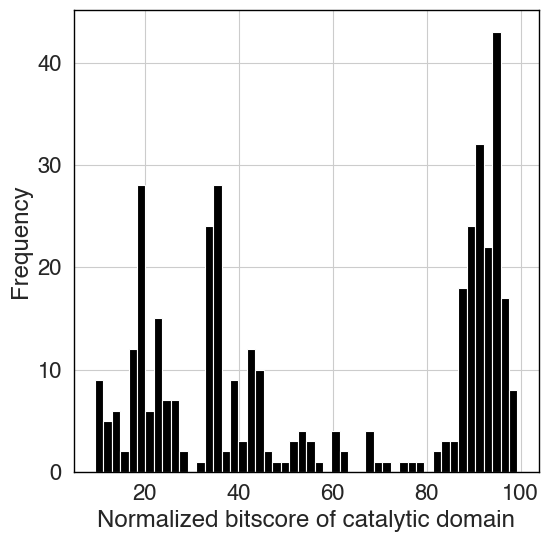

In [10]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
cat_scores['normalized_score'].hist(bins=50, ax=ax, color='black');
ax.set_xlabel('Normalized bitscore of catalytic domain');
ax.set_ylabel('Frequency');

for spine in ax.spines.values():
    spine.set_edgecolor('black')

f.savefig(figures_folder / 'figure3' / 'phage_endolysins_cat_bitscore.pdf', dpi=300, bbox_inches='tight', transparent=True);

## Structural vs sequence homology ranking